In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)
import matplotlib.pyplot as plt
import progressbar
import scipy

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py,progressbar,scipy

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.7
IPython version      : 7.18.1

pandas     : 1.2.0
keras      : 2.4.3
numpy      : 1.19.5
math       : unknown
tensorflow : 2.4.0
matplotlib : 3.3.3
h5py       : 2.10.0
progressbar: 2.5
scipy      : 1.5.2

Compiler    : Clang 12.0.0 (clang-1200.0.32.28)
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Feb 15 2021 18:32:30CET



## Load of the data

In [3]:
from process import loaddata
regr_data = loaddata("../data/regression/250.csv")
class_data = loaddata("../data/classifier/250.csv")

In [4]:
np.random.shuffle(regr_data)
y = regr_data[:,-3:]
x = regr_data[:,:6]

In [5]:
np.random.shuffle(class_data)
yc = class_data[:,0]
xc = class_data[:,1:]

In [6]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 125414 
Valuation sample: 41805


In [7]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras import regularizers

## !! 
The dropout 0.2 seems to work better

In [9]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (12, kernel_initializer= "normal" , input_shape = x.shape))
    model.add (layers.Dense (32, activation = "relu"))
    model.add (layers.Dense (64, activation = "relu"))
    model.add (layers.Dense (128, activation = "relu"))
    model.add (layers.Dense (128, activation = "relu"))
    model.add (layers.Dense (64, activation = "relu"))
    model.add (layers.Dense (32, activation = "relu"))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mape"])
    return model

In [11]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 50, validation_data = (x_val, y_val) )
model.save("../models/regression/large_mse250.h5")

Epoch 1/20
2509/2509 [==============================] - 7s 2ms/step - loss: 3.3013e-04 - mape: 180.9523 - val_loss: 2.7625e-05 - val_mape: 88.1075
Epoch 2/20
2509/2509 [==============================] - 6s 2ms/step - loss: 2.5775e-05 - mape: 78.6669 - val_loss: 4.2731e-05 - val_mape: 109.5413
Epoch 3/20
2509/2509 [==============================] - 5s 2ms/step - loss: 1.7518e-05 - mape: 70.7085 - val_loss: 2.1734e-05 - val_mape: 68.0876
Epoch 4/20
2509/2509 [==============================] - 6s 2ms/step - loss: 1.3996e-05 - mape: 62.7267 - val_loss: 5.5324e-06 - val_mape: 34.9234
Epoch 5/20
2509/2509 [==============================] - 5s 2ms/step - loss: 1.1909e-05 - mape: 62.3423 - val_loss: 5.9192e-06 - val_mape: 34.3578
Epoch 6/20
2509/2509 [==============================] - 5s 2ms/step - loss: 1.0522e-05 - mape: 59.5063 - val_loss: 1.7262e-05 - val_mape: 67.6448
Epoch 7/20
2509/2509 [==============================] - 5s 2ms/step - loss: 9.5398e-06 - mape: 47.4076 - val_loss: 1.1727e

<ipython-input-12-51c767b16e1e>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


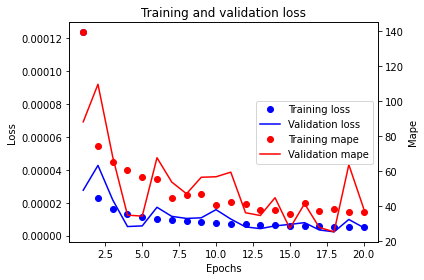

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['mape']
val_accuracy = history.history['val_mape']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training mape')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation mape')
ax2.set_ylabel('Mape')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
fig.savefig("acc+loss_drop_regression.pdf")
fig.show()

## Test spectrum

In [20]:
from tensorflow import keras
model_regr = keras.models.load_model('../models/regression/large_mse250.h5')
model_class = keras.models.load_model('../models/classifier/with-dropout-250.h5')

In [21]:
model_regr.summary()
model_class.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 167219, 12)        84        
_________________________________________________________________
dense_10 (Dense)             (None, 167219, 32)        416       
_________________________________________________________________
dense_11 (Dense)             (None, 167219, 64)        2112      
_________________________________________________________________
dense_12 (Dense)             (None, 167219, 128)       8320      
_________________________________________________________________
dense_13 (Dense)             (None, 167219, 128)       16512     
_________________________________________________________________
dense_14 (Dense)             (None, 167219, 64)        8256      
_________________________________________________________________
dense_15 (Dense)             (None, 167219, 32)       

In [22]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step', density=True)
    plt.yscale("log")
    plt.show()

In [23]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

In [24]:
y = []
pred = []

y = model_class.predict(xc)
data = np.hstack((y, xc))
data = data[np.logical_not(data[:,0] > 0.5)]
pred = model_regr.predict(data[:,1:7])

In [25]:
final_p_nn = []
for pred_ in pred:
    final_p_nn.append(np.linalg.norm(pred_))

In [27]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

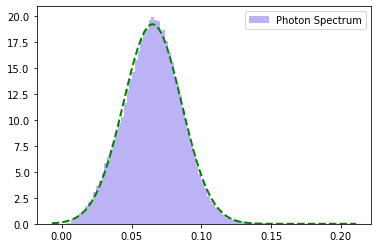

In [28]:
mean,std=norm.fit(final_p)
plt.hist(final_p, bins=100, alpha = 0.5, color = 'mediumslateblue', label='Photon Spectrum', density = True)
plt.legend(loc='upper right')
xmin, xmax = plt.xlim()
x_p = np.linspace(xmin, xmax, 100)
y_p = norm.pdf(x_p, mean, std)
plt.plot(x_p, y_p,'g--', linewidth=2)
plt.show()

In [29]:
print('mean = ', mean)
print('std = ', std)
print("chi square = ", stats.chisquare(final_p))

mean =  0.06500765839861218
std =  0.020780362624671832
chi square =  Power_divergenceResult(statistic=1110.7781874419409, pvalue=1.0)


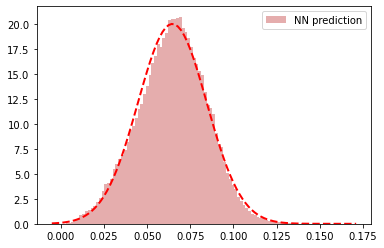

In [30]:
mean_nn,std_nn=norm.fit(final_p_nn)
plt.hist(final_p_nn, bins=100, alpha = 0.5,  color = 'indianred', label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x_nn = np.linspace(xmin, xmax, 100)
y_nn = norm.pdf(x_nn, mean_nn, std_nn)
plt.plot(x_nn, y_nn,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [31]:
print('mean = ', mean)
print('std = ', std)
print("chi square = ", stats.chisquare(final_p_nn))

mean =  0.06500765839861218
std =  0.020780362624671832
chi square =  Power_divergenceResult(statistic=1116.8196495618133, pvalue=1.0)


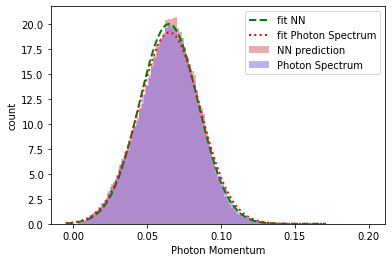

In [32]:
plt.hist(final_p_nn, 100, alpha=0.5, color = 'indianred', label='NN prediction', density = True)
plt.hist(final_p, 100, alpha=0.5, color = 'mediumslateblue', label='Photon Spectrum', density = True)
plt.xlabel('Photon Momentum')
plt.ylabel('count')
plt.legend(loc='upper right')
x_nn = np.linspace(xmin, xmax, 100)
y_nn = norm.pdf(x_nn, mean_nn, std_nn)
plt.plot(x_nn, y_nn,'g--', label = 'fit NN', linewidth = 2)
plt.legend(loc='upper right')
x_p = np.linspace(xmin, xmax, 100)
y_p = norm.pdf(x_p, mean, std)
plt.plot(x_p, y_p, 'r:', label = 'fit Photon Spectrum', linewidth = 2)
plt.legend(loc = 'upper right')
plt.show()

<ipython-input-33-6babc77daf4a>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


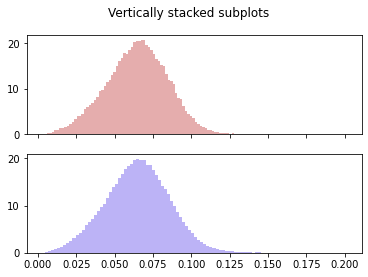

In [33]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(final_p_nn, 100, alpha=0.5, color = 'indianred', label='NN prediction', density = True)
axs[1].hist(final_p, 100, alpha=0.5, color = 'mediumslateblue', label='Photon Spectrum', density = True)
fig.show()